# Getting started with HTRC Extracted Features

This tutorial will get you up-and-running with the HTRC Extracted Features dataset. Learn more about the data: https://wiki.htrc.illinois.edu/x/GoA5Ag

The code and instructions used in this notebook combine elements from a Programming Historian lesson called "Text Mining in Python through the HTRC Feature Reader" (https://programminghistorian.org/en/lessons/text-mining-with-extracted-features) and the Berkeley Data Science Module, "Library-HTRC" (https://github.com/ds-modules/Library-HTRC).


## Set-up and reading in files

To get started, we need to import the Python modules we'll use throughout this notebook.

In [2]:
from htrc_features import FeatureReader
import matplotlib
import matplotlib.pyplot as plt
import numpy 
import pandas 
import glob

Extracted Featuers files are originally formatted in JSON notation and compressed; you'll notice the file format is '.json.bz2'. The FeatureReader library is able to work with the files in that format with needing to decompress the files.

Within the library, there is a **FeatureReader object** that is used for loading the dataset files and making sense of them. It returns a **Volume object** for each file. A Volume is a representation of a single item in HathiTrust, for example a book or other textual work. From the Volume, you can access features about the work. To drill down to the features derived from individual pages, use the **Page object**.

We'll need to get the FeatureReader ready to use by pointing it to the file paths for the sample Extracted Features files we are using in this notebook. The files are in directory called 'ef-data'. We'll be using the Extracted Features files four our workset of all 30 volumes of Josiah Conder's _The Modern Traveller_.
 
With fr = FeatureReader(paths) below, the FeatureReader is initialized, meaning it is ready to use. An initialized FeatureReader is holding references to the file paths that we gave it, and will load them into Volume objects when asked.

In [3]:
# create a list of file paths from ef-data directory and load the data in the Feature Reader

file_paths = glob.glob('ef-data/*.bz2') # glob is a library that will search a file path and return 
                                        # files with a given extension (format)

fr_mt = FeatureReader(file_paths)

Let's see what titles have been loaded as Volumes. Because these are volumes within a larger work, they have the same basic title.

In [4]:
for vol in fr_mt.volumes():
    print(vol.title)

The modern traveller; a description of the various countries of the globe. By Josiah Conder ...
The modern traveller; a description of the various countries of the globe. By Josiah Conder ...
The modern traveller; a description of the various countries of the globe. By Josiah Conder ...
The modern traveller; a description of the various countries of the globe. By Josiah Conder ...
The modern traveller; a description of the various countries of the globe. By Josiah Conder ...
The modern traveller; a description of the various countries of the globe. By Josiah Conder ...
The modern traveller; a description of the various countries of the globe. By Josiah Conder ...
The modern traveller; a description of the various countries of the globe. By Josiah Conder ...
The modern traveller; a description of the various countries of the globe. By Josiah Conder ...
The modern traveller; a description of the various countries of the globe. By Josiah Conder ...
The modern traveller; a description of t

## File and page structure

We can call just one Volume at a time in order to examine its contents. In this example, we are taking the first file.

In [93]:
vol = fr_mt.first()
vol

We can also call the URL for the volume and CTRL-click it to find the corresponding item in the HathiTrust Digital Library (HTDL). 

These volumes are in the public domain, so we will find that they are available for "Full View" in the HTDL. If they were still under copyright, we would be taken to a "Limited View" page. The Extracted Features dataset includes a snapshot of 15.7 million volumes from the HTDL and is agnostic to rights status, as the files represent data about the volumes. 

In [6]:
print(vol.handle_url)

http://hdl.handle.net/2027/mdp.39015073767785


Let's see what other metadata elements are available to you for each item in its corresponding Extracted Features file. Put your cursor between the period and the end parenthesis, and press tab. You can choose from the dropdown list. Then run the cell.

In [7]:
#Put your cursor between the period . and the end parenthesis ) and press tab. You can choose from the dropdown list.
print(vol.author)

['Conder, Josiah 1789-1855 ']


It's time to access the first features of vol, which is a table of total words for every single page. These can be accessed simply by calling vol.tokens_per_page().

In [8]:
tokens = vol.tokens_per_page()
# Show just the first few rows, so we can look at what it looks like
tokens.head()

,count
page,
1,0
2,0
3,0
4,0
5,40


This is a straightforward table of information, similar to what you would see in Excel or Google Spreadsheets. Listed in the table are page numbers and the count of words on each page. 

With only two dimensions, it is trivial to plot the number of words per page. The table structure holding the data has a plot method for data graphics. Without extra arguments, tokens.plot() will assume that you want a line chart with the page on the x-axis and word count on the y-axis.

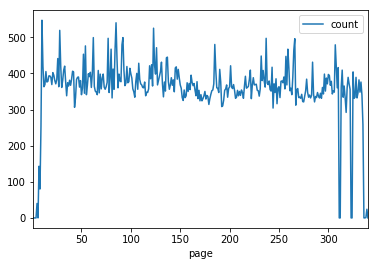

In [9]:
%matplotlib inline
tokens.plot()

How did we get here? When we ran vol.tokens_per_page(), it returned a Pandas DataFrame. This means that after setting tokens, we're no longer working with HTRC-specific code, just book data held in a common and very robust table-like construct from Pandas. tokens.head() used a DataFrame method to look at the first few rows of the dataset, and tokens.plot() uses a method from Pandas to visualize data.

## Loading a Token List
Another DataFrame accessible to us is `vol.tokenlist()`, which can be called to return section-, part-of-speech-, and word-specific details.

Let's use this method to look at some words deeper into the book: from 1000th to 1100th row, skipping by 15, denoted by `[1000:1100:15]`:

In [28]:
tl = vol.tokenlist()
tl[1000:1100:15]

count
page section token   pos         
13   body    )       -RRB-      1
             Many    JJ         1
             all     PDT        1
             breadth NN         1
             feet    NNS        2
             half    NN         2
             infest  VBP        1

As before, the data is returned as a Pandas DataFrame. This time, there is much more information. The columns in bold are an index. Unlike the typical one-dimensional index seen before, here there are four dimensions to the index: page, section, token, and pos. This row says that for the 24th page, in the body section (i.e. ignoring any words in the header or footer), the word 'years' occurs 1 time as an plural noun. The part-of-speech tag for a plural noun, NNS, follows the Penn Treebank definition.

You can sort of see this as nested information, moving beyond how we might normally work with tabular or spreadsheet data. The blank cells are areas where the data would have normally been duplicated.

The HTRC Feature Reader refers to "pages" as the $n^{th}$ scanned image of the volume, not the actual number printed on the page. This is why, often, the first page may be the cover, or inside cover, or a blank page.

Tokenlists can be retrieved with arguments -- or the stuff that goes inside the `()` -- that combine information by certain dimensions, such as case, POS, or page. For example, `case=False` specified that "Jaguar" and "jaguar" should be counted together. You may also notice that, by default, only `body` is returned, a default that can be overridden.

Look at the following list of commands: can you guess what the output will look like? Try for yourself and observe how the output changes.

```python
vol.tokenlist(case=False)
vol.tokenlist(pos=False)
vol.tokenlist(pages=False, case=False, pos=False)
vol.tokenlist(section='header')
vol.tokenlist(section='group')
```

Details for these arguments are available in the code documentation for the Feature Reader or by running:

```python
vol.tokenlist?
```

## Working with DataFrames

The Pandas DataFrame type returned by the HTRC Feature Reader is very malleable. To work with the tokenlist that you retrieved earlier (`tl`), three skills are particularily valuable:

1. Selecting subsets by a condition
2. Slicing by named row index
3. Grouping and aggregating

### Selecting Subsets of a DataFrame by a Condition

Consider this example: *I only want to look at tokens that occur more than a hundred times in the book.* 

Remembering that the table-like output from the HTRC Feature Reader is a Pandas DataFrame, the way to pursue this goal is to learn to filter and subset DataFrames. Knowing how to do so is important for working with just the data that you need.

To subset individual rows of a DataFrame, you can provide a series of True/False values to the DataFrame, formatted in square brackets. When True, the DataFrame returns that row; when False, the row is excluded from what is returned.

To see this in context, first load a basic tokenlist without parts-of-speech or individual pages:

In [29]:
tl_simple = vol.tokenlist(pos=False, pages=False)
# .sample(5) returns five random words from the full result
tl_simple.sample(5)

count
section token            
body    Stripped        1
        hostile         4
        gentleman       3
        expiration      1
        justices        1

To select just the relevant tokens, we need to look at each row and evaluate whether it matches the criteria that "this token has a count greater than 100". Let's try to convert that requirement to code.

"This token has a count" means that we are concerned specifically with the 'count' column, which can be singled out from the `tl` table with `tl['count']`. "greater than 100" is formalized as `> 100`. Putting it together, try the following and see what you get:

```python
tl_simple['count'] > 100
```

It is a DataFrame of True/False values. Each value indicates whether the 'count' column in the corresponding row matches the criteria or not. We haven't selected a subset yet, we simply asked a question and were told for each row when the question was true or false.

> You may wonder why section and token are still seen, even though 'count' was selected. These are part of the DataFrame **index**, so they're considered part of the information *about* that row rather than data *in* the row. You can convert the index to data columns with `reset_index()`. In this lesson we will keep the index intact, though there are advanced cases where there are benefits to resetting it.

Armed with the True/False values of whether each token's 'count' value is or isn't greater than 100, we can give those values to `tl_simple` in square brackets:

In [30]:
matches = tl_simple['count'] > 100
tl_simple[matches].sample(5)

count
section token       
body    time     114
        great    181
        not      356
        It       193
        in      1863

You can move the comparison straight into the square brackets, the more conventional equivalent of the above:

In [31]:
tl_simple[tl_simple['count'] > 100].sample(5)

count
section token       
body    an       286
        not      356
        small    124
        be       420
        been     289

As might be expected, many of the tokens that occur very often are common words like "she" and "and", as well as various punctuation. 

Multiple conditions can be chained with `&` (and) or `|` (or), using regular brackets so that Python knows the order of operations. For example, words with a count greater than 150 *and* a count less than 200 are selected in this way:

In [32]:
tl_simple[(tl_simple['count'] > 150) & (tl_simple['count'] < 200)]

count
section token       
body    :        176
        Cape     152
        It       193
        They     158
        being    162
        great    181
        into     190
        miles    156
        most     182
        no       161
        only     151
        p        180
        part     196
        river    199
        some     164
        town     173
        two      161

We'll practice slicing by named row index first.For example, we can add a word between the quotation marks to retrieve only pages where that word occurs. We are using the power of the DataFrame index to retrieve only the rows that match our criteria:

In [35]:
tl_all = vol.tokenlist(section='all')

# add a word between the quotes
chapter_pages = tl_all.loc[(slice(None), slice(None), "India"),]
chapter_pages

,,,,count
page,section,token,pos,
70,body,India,NNP,1
71,body,India,NNP,1
73,body,India,NNP,1
84,body,India,NNP,3
111,body,India,NNP,1
131,body,India,NNP,2
143,body,India,NNP,1
151,body,India,NNP,1
166,body,India,NNP,1


### Slicing DataFrames
It is also possible to select a DataFrame subset by specifying the values of its index, a process called **slicing**. For example, you can ask, *"give me all the verbs for pages 9-12"*.

In the DataFrame returned by `vol.tokenlist()`, page, section, token, and POS were part of the index (try the command `tl.index.names` to confirm). One can think of an index as the margin content of an Excel spreadsheet: the letters along the top and numbers along the left side are the indices. A cell can be referred to as A1, A2, B1... In Pandas, however, you can name these, so instead of A, B, C, or 1,2,3, columns and rows can be referred to by more descriptive names. You can also have multiple levels, so you're not bound by the two-dimensions of a table format. With a multi-indexed DataFrame, you can ask for `Page=24,section=Body, ...`.  One can think of an index as the margin notations in Excel (i.e. 1,2,3... and A,B,C,..), except it can be named and can have multiple levels.

Slicing a DataFrame against a labelled index is done using `DataFrame.loc[]`. Try the following examples and see what is returned:

- Select information from page 17: 
  - `tl.loc[(17),]`
- Select 'body' section of page 17:
  - `tl.loc[(17, 'body'),]`
- Select counts of the word 'Anne' in the 'body' section of page 17:
  - `tl.loc[(17, 'body', 'Anne'),]`

In [18]:
# use this code cell to try out the above examples



The levels of the index are specified in order, so in this case the first value refers to 'page', then 'section', and so on. To skip specifying anything for an index level -- that is, to select everything for that level -- `slice(None)` can be used as a placeholder:

- Select counts of the word 'Anne' for all pages and all page sections
  - `tl.loc[(slice(None), slice(None), "Anne"),]`
  
Finally, it is possible to select multiple labels for a level of the index, with a list of labels (i.e. `['label1', 'label2']`) or a sequence covering everything from one value to another (i.e. `slice(start, end)`):

- Select pages 37, 38, and 52
  - `tl.loc[([37, 38, 52]),]`
- Select all pages from 37 to 40
  - `tl.loc[(slice(37, 40)),]`
- Select counts for 'Anne' or 'Hilary' from all pages
  - `tl.loc[(slice(None), slice(None), ["Anne", "Hilary"]),]`
  
> _The reason for the comma in `tl.loc[(...),]` is because columns can be selected in the same way after the comma. Pandas DataFrames can have a multiple-level index for columns, but the HTRC Feature Reader does not use this._

Knowing how to slice, let's try to find the sections in this book, and compare where that shows up to the token-per-page pattern previously plotted.

The token list we previously set to `tl` only included body text; to include headers and footers in a search, we could generate a tokenlist with `section='all'` specified. Since our workset, the volumes of Josiah Conder's _The Modern Traveller_, does not include chapter headings or breaks, but instead has named sections, as laid out in the table of contents, we'll be recreating a search for chapters by searching for specific page numbers in the header:

In [19]:
tl_header = vol.tokenlist(section='header')
section_breaks = ['1','5','19','26','35','40','48','55','79','87','89','92','93','95',
                  '103','106','110','116','125','127','136','141','143','145','157','158',
                  '179','193','195','199','207','215','222','236','243','253','256','260',
                  '261','285','301','311','312','319']

section_pages = tl_header.loc[(slice(None), slice(None), section_breaks),]
section_pages

,,,,count
page,section,token,pos,
48,header,40,CD,1
56,header,48,CD,1
100,header,92,CD,1
103,header,95,CD,1
106,header,93,CD,1
114,header,106,CD,1
118,header,110,CD,1
124,header,116,CD,1
144,header,136,CD,1


Do you see anything interesting about the results above?

Earlier, token counts were visualized using `tokens.plot()`, a built-in function of DataFrames that uses the Matplotlib visualization library.

We can add to the earlier visualization by using Matplotlib directly. Try the following code in a new cell, which goes through each page in the earlier search for page sections, by number, and adds a red vertical line at the place in the chart with matplotlib.pyplot.axvline():

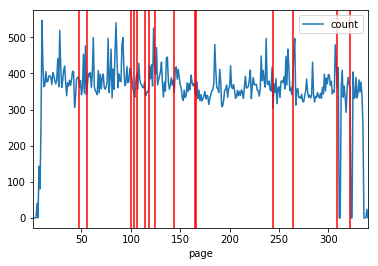

In [21]:
# Get just the page numbers from the search for "CHAPTER"
page_numbers = section_pages.index.get_level_values('page')

# Visualize the tokens-per-page from before
tokens.plot()

# Add vertical lines for pages with "CHAPTER"
import matplotlib.pyplot as plt
for page_number in page_numbers:
    plt.axvline(x=page_number, color='red')

### Bonus: Sorting DataFrames 
A DataFrame can be sorted with `DataFrame.sort_values()`, specifying the column to sort by as the first argument. By default, sorting is done in ascending order:

In [36]:
tl_simple.sort_values('count').head()

count
section token          
body    embossed      1
        floods        1
        float         1
        flinch        1
        fleets        1

Descending order is possible with the argument `ascending=False`, which puts the most common tokens at the top. For example:

In [37]:
tl_simple.sort_values('count', ascending=False).head()

count
section token       
body    ,      10676
        the     8383
        of      5256
        .       4219
        and     3496

## Relative Frequencies and Stopword lists

Now we'll look at a look using relative frequencies. Relative frequencies are one way at looking at top words, through their proportional counts. Books have different lengths, so the nominal count of any given word will vary between books, so relative frequencies give us a way to compare two or more books.

Still looking at one volume, let's start to explore the relative frequencies of tokens within the volume. 

The following cell will display the most common tokens (words or punctuation marks) in a given volume, alongside the number of times they appear. It will also calculate their relative frequencies (found by dividing the number of appearances over the total number of words in the book) and display the results in a DataFrame. The cell may take a few seconds to run because we're looping through every word in the volume!

In [38]:
tokens = vol.tokenlist(pos=False, case=False, pages=False).sort_values('count', ascending=False)

freqs = []
for count in tokens['count']:
    freqs.append(count/sum(tokens['count'])) # generating a frequency by volume for a given token 
                                             # by counting it's frequency in the volume, and dividing 
                                             # by total tokens in the volume
    
tokens['rel_frequency'] = freqs
tokens

count  rel_frequency
section lowercase                              
body    ,                  10676       0.088276
        the                 9491       0.078478
        of                  5312       0.043923
        .                   4219       0.034885
        and                 3516       0.029073
        to                  2461       0.020349
        a                   2202       0.018208
        in                  2015       0.016661
        is                  1449       0.011981
        ;                   1372       0.011345
        are                 1030       0.008517
        their                940       0.007773
        which                895       0.007400
        by                   877       0.007252
        with                 875       0.007235
        from                 806       0.006665
        "                    789       0.006524
        they                 763       0.006309
        as                   750       0.006201
        it                   726       0.006003
        that                 715       0.005912
        on                   690       0.005705
        or                   592       0.004895
        at                   579       0.004788
        this                 545       0.004506
        for                  524       0.004333
        was                  517       0.004275
        have                 437       0.003613
        but                  425       0.003514
        be                   420       0.003473
...                          ...            ...
        cow-hide               1       0.000008
        motions                1       0.000008
        cowards                1       0.000008
        cowrie                 1       0.000008
        cowrie-shells          1       0.000008
        mourzouk               1       0.000008
        mousaiah               1       0.000008
        moussa                 1       0.000008
        cotton-tree            1       0.000008
        coto                   1       0.000008
        cottage                1       0.000008
        mulouk                 1       0.000008
        muley                  1       0.000008
        cottages               1       0.000008
        mulberry               1       0.000008
        cotton-plantation      1       0.000008
        cotton-shrub           1       0.000008
        mudford                1       0.000008
        cottons                1       0.000008
        coupled                1       0.000008
        couchant               1       0.000008
        countcy                1       0.000008
        countenanced           1       0.000008
        counteractive          1       0.000008
        mow                    1       0.000008
        counterpane            1       0.000008
        counterpart            1       0.000008
        counting               1       0.000008
        couple                 1       0.000008
        ►                      1       0.000008

[11765 rows x 2 columns]

Now, let's plot the most common tokens from the volume and their frequencies. The following cell outputs a bar plot using the matplotlib library.

Text(0.5, 1.0, 'Common token frequencies in "The modern traveller..."')

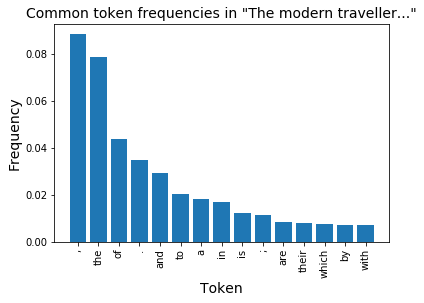

In [42]:
# First, we use a command that helps matplotlib plots better display in Jupyter
%matplotlib inline

# Build a list of frequencies and a list of tokens.
freqs_1, tokens_1 = [], []
for i in range(15):  # top 15 words
    freqs_1.append(freqs[i])
    tokens_1.append(tokens.index.get_level_values('lowercase')[i])

# Create a range for the x-axis
x_ticks = numpy.arange(len(tokens_1))

# Plot!
plt.bar(x_ticks, freqs_1)
plt.xticks(x_ticks, tokens_1, rotation=90)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Token', fontsize=14)
plt.title('Common token frequencies in "' + vol.title[:20] + '..."', fontsize=14)

As you can see, the most common tokens are mostly punctuation and basic words that don't provide context. Let's see if we can narrow our search to gain some more relevant insight. 

We can get a list of stopwords from the nltk library. Punctuation is in the string library. Let's import nltk and make the stopwords and punctuation accessible to us:

In [43]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rdubnic2/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Now that we have imported the nltk library and downloaded the stopwords module, we can look at what is included in each list:

In [51]:
from nltk.corpus import stopwords
from string import punctuation

print(f"Stopwords: \n {stopwords.words('english')}")

print()

print(f"Punctuation: \n {punctuation}")

Stopwords: 
 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

With these lists of words/characters to ignore in our DataFrame, we can make a few tweaks to our plotting cell to remove the punctuation and display only those words not in our stopword list:

Text(0.5, 1.0, 'Common token frequencies in "The modern traveller..."')

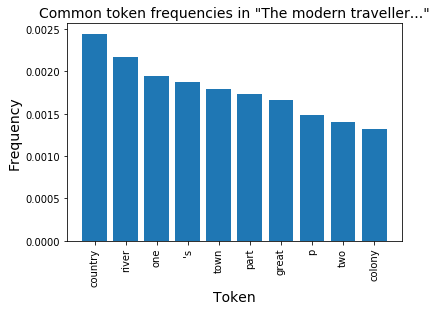

In [54]:
freqs_filtered, tokens_filtered, i = [], [], 0

while len(tokens_filtered) < 10:
    if tokens.index.get_level_values('lowercase')[i] not in stopwords.words('english') + list(punctuation):
        freqs_filtered.append(freqs[i])
        tokens_filtered.append(tokens.index.get_level_values('lowercase')[i])
    i += 1

# Create a range for the x-axis
x_ticks = numpy.arange(len(freqs_filtered))

# Plot!
plt.bar(x_ticks, freqs_filtered)
plt.xticks(x_ticks, tokens_filtered, rotation=90)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Token', fontsize=14)
plt.title('Common token frequencies in "' + vol.title[:20] + '..."', fontsize=14)

## Tokens from all volumes in our set

Now let's see how word frequencies compare across all the books in our samples. 

First we'll set-up a few functions. The first finds the most common noun in a volume, with adjustable parameters for minimum length. The second calculates the relative frequency of a token across all volumes in a FeatureReader collection, saving us the time of doing the calculation like in the above cell. Finally, we'll have a visualization function to create a bar plot of relative frequencies for all volumes in our sample, so that we can easily track how word frequencies differ across titles.

### Most common nouns

Let's see what the most common nouns in this work are by word length. To try, add a number to the second code box below.

NOTE: `word_length` defaults to 2. e.g. `most_common_noun(fr_novels.first)` returns 'time'.

In [58]:
#establishing the function used in the next box
def most_common_noun(vol, word_length=2):   
    # Build a table of common nouns
    tokens_1 = vol.tokenlist(pages=False, case=False) # create token list DF
    nouns_only = tokens_1.loc[(slice(None), slice(None), ['NN']),] # slice token list DF to get DF with only nouns
    top_nouns = nouns_only.sort_values('count', ascending=False) # sort the noun DF by highest count

    token_index = top_nouns.index.get_level_values('lowercase') # creating a new DF with token (here noun) frequency 
                                                                # as index
    
    # Choose the first token at least as long as word_length with non-alphabetical characters
    for i in range(max(token_index.shape)):
        if (len(token_index[i]) >= word_length):
            if("'", "!", ",", "?" not in token_index[i]):
                return token_index[i]
    print('There is no noun of this length')
    return None

In [67]:
#add a number to the parenthesis between the comma , and end parenthesis )
most_common_noun(vol, 10)
# most_common_noun(fr_mt.first(), 10) # the same as above, but using a FeatureReader collection instead of a variable

'settlement'

### Relative token frequency
Here, the function `frequency()` returns a plot of the usage frequencies of the given word across all volumes in the given FeatureReader collection (which could include one or more volumes).

NOTE: `frequency()` returns a dictionary entry of the form `{'word': frequency}`. e.g. `frequency(fr_novels.first(), 'blue')` returns `{'blue': 0.00012}`

Try adding a word in the single quotes in the last line below.

In [60]:
#establishing the function used in the next box
def frequency(vol, word):
    t1 = vol.tokenlist(pages=False, pos=False, case=False)
    token_index = t1[t1.index.get_level_values("lowercase") == word]
    
    if len(token_index['count'])==0:
        return {word: 0}
    
    count = token_index['count'][0]
    freq = count/sum(t1['count'])
    
    return {word: float('%.5f' % freq)} # '%.5f' means it'll return a float rounded to 5 decimal places

In [62]:
#add a word in the quotes below
frequency(vol, 'elephant')

{'elephant': 5e-05}

### Putting them together

The code below returns a plot of the usage frequencies of the given word across all volumes in the given FeatureReader collection.

Try adding different words to see their relative frequency in our sample.

NOTE: frequencies are given as percentages rather than true ratios.

In [75]:
#establishing the function used in the next box
def frequency_bar_plot(word, FR_col):
    freqs, titles = [], []
    for vol in FR_col:
        title = vol.title
        short_title = title[:6] + (title[6:] and '..')
        freqs.append(100*frequency(vol, word)[word]) # calling our frequency function
        titles.append(short_title)
        
    # Format and plot the data -- this replicates the code we used outside of the function in our bar chart above
    x_ticks = numpy.arange(len(titles))
    plt.bar(x_ticks, freqs)
    plt.xticks(x_ticks, titles, fontsize=10, rotation=45)
    plt.ylabel('Frequency (%)', fontsize=12)
    plt.title('Frequency of "' + word + '"', fontsize=14)

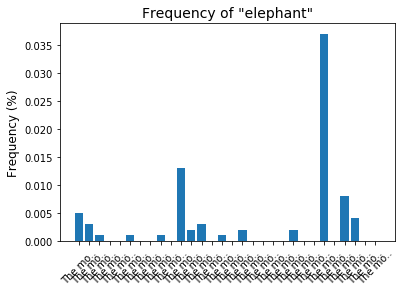

In [76]:
# add a word to between the quotes
frequency_bar_plot('elephant', fr_mt)

Okay, that's interesting, but since all our titles are the same, it's hard to make sense of the results. Let's try plotting relative frequency over time.

The code below returns a DataFrame of relative frequencies, volume years, and page counts, along with a scatter plot.

NOTE: frequencies are given in percentages rather than true ratios.

Try adding a word in the single quotes in the last line below.

In [80]:
#establishing the function used in the next box
def frequency_by_year(query_word, FR_col):
    volumes = pandas.DataFrame()
    years, page_counts, query_freqs = [], [], []

    for vol in FR_col:
        years.append(int(vol.year))
        page_counts.append(int(vol.page_count))
        query_freqs.append(100*frequency(vol, query_word)[query_word])
    
    volumes['year'], volumes['pages'], volumes['freq'] = years, page_counts, query_freqs
    volumes = volumes.sort_values('year')
    
    # Set plot dimensions and labels
    scatter_plot = volumes.plot.scatter('year', 'freq', color='black', s=50, fontsize=12)
    plt.ylim(0-numpy.mean(query_freqs), max(query_freqs)+numpy.mean(query_freqs))
    plt.ylabel('Frequency (%)', fontsize=12)
    plt.xlabel('Year', fontsize=12)
    plt.title('Frequency of "' + query_word + '"', fontsize=14)
    
    return volumes.head(10)

,year,pages,freq
0,1830,340,0.005
27,1830,374,0.004
26,1830,414,0.008
25,1830,372,0.000
24,1830,388,0.037
23,1830,394,0.000
22,1830,364,0.000
21,1830,388,0.002
20,1830,372,0.000
19,1830,386,0.000


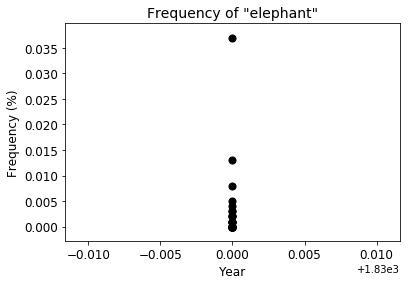

In [81]:
#add a word to between the quotes
frequency_by_year('elephant', fr_mt)

### Making use of the structured file

One particularly useful thing about the Extracted Features dataset is that the tokens in the extracted features files are part-of-speech tagged to differentiate homynyms like 'rose', which can be a name, a noun, and a verb.

For each page, the data is also divided into a header, body, and footer section so that you can systematically remove headers or footers from your data if you choose.

We already saw the possibiity of drilling down to the part-of-speech tag earlier when we found the most frequently-occuring noun in a volume. Below, we will look for one part of speech in just the body of our volumes.

What do you find? Try editing the code to retrieve tokens of another part of speech. Here are the codes in the Penn Treebank: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html. 

The code is set to retrieve only tokens that occured more than 50 times. Can you change the cut-off and see how it effects your results?

In [89]:
#list the most frequently occuring adjectives that occured more than 50 times in the data
idx = pandas.IndexSlice
vol = next(fr_mt.volumes())
tl = vol.tokenlist(pages=False)
tl.index = tl.index.droplevel(0)
adjectives = tl.loc[idx[:,('JJ')],]
adj_dfs = [adjectives for vol in fr_mt.volumes()]
all_adj = pandas.concat(adj_dfs).groupby(level='token').sum().sort_values('count', ascending=False)[:50]

# displays the first 25 rows of the Pandas dataframe of all adjectives
all_adj.head(25)

,count
token,
other,6210
great,5430
large,4260
small,3720
same,3510
many,3240
first,2700
few,2520
high,2370


### More frequency questions
Let's combine what we've learned and written to try to answer some specific questions. First, we'll define a number of variables that we will use later:

In [91]:
vol1 = fr_mt.first() # the first volume in our FR collection
tokens = vol1.tokenlist(pages=False, pos=False, case=False) # a token list created from that volume
tokens = tokens.loc['body'] # Only focus on section='body'

# removing stop words and non-alphabetical characters, such as punctuation and numbers:
subset1 = tokens[~tokens.index.isin(stopwords.words('english')) & tokens.index.str.isalpha()]

Another way to look at notable words is through parts-of-speech. e.g. focusing on `NNP` (proper nouns):

In [92]:
tokens = vol1.tokenlist(pages=False, pos=True, case=True).loc['body']
proper_nouns_v1 = tokens.loc[(slice(None), ('NNP')),].sort_values('count', ascending=False) # Select NNP and sort
proper_nouns_v1['rel_freq'] = proper_nouns_v1['count'] / proper_nouns_v1['count'].sum() # Calculate Relative frequency
proper_nouns_v1.head(5)

,,count,rel_freq
token,pos,,
Cape,NNP,151,0.019801
Mr.,NNP,105,0.013769
Africa,NNP,96,0.012589
N.,NNP,92,0.012064
E.,NNP,79,0.010359


The value of relative frequencies is that it is easy to compare multiple books. First, let's load volume two of  _The Modern Traveller_ to compare:

In [97]:
vol2 = FeatureReader('ef-data/mdp.39015073767751.json.bz2').first()
tokens = vol2.tokenlist(pages=False, pos=True, case=True).loc['body']
proper_nouns_v2 = tokens.loc[(slice(None), ('NNP')),].sort_values('count', ascending=False)
proper_nouns_v2['rel_freq'] = proper_nouns_v2['count'] / proper_nouns_v2['count'].sum()

In [98]:
proper_nouns_v1.head(2)

,,count,rel_freq
token,pos,,
Cape,NNP,151,0.019801
Mr.,NNP,105,0.013769


In [99]:
proper_nouns_v2.head(2)

,,count,rel_freq
token,pos,,
Mexico,NNP,333,0.047463
Cortes,NNP,241,0.034350


Since the index of 'token' and 'pos' is the same, you can just subtract one DataFrame from another and the code will know to align the rows (i.e. subtracting the `(Cape, NNP)` information). We can do this to see which tokens increased in usage from volume 1 to volume 2:

In [100]:
compare_books = (proper_nouns_v2 - proper_nouns_v1)
compare_books.sort_values('rel_freq', ascending=False).dropna()

,,count,rel_freq
token,pos,,
Spain,NNP,112.0,0.015975
New,NNP,97.0,0.013905
San,NNP,77.0,0.010998
de,NNP,71.0,0.010143
America,NNP,44.0,0.006317
Europe,NNP,40.0,0.005849
Mina,NNP,36.0,0.005143
American,NNP,31.0,0.004453
Indian,NNP,28.0,0.004048


In the name of minimizing hassle, we've used our _The Modern Traveller_ workset again for this, but it's admittedly not the most interesting workset for this type of question, as each volume is focused on a different region of the world, as shown by 'Cape' and 'Mr.' -- the most frequent proper nouns in volume 1 -- shown here as having the largest drop in frequency when compared to volume 2.